### NAME : DEEPASHA MISHRA
TASK 2 : THE SPARKS FOUNDATION INTERHSIP

PREDICTION USING THE UNSUPERVISED ML

OBJECTIVE : From the dataset Iris,predict the optimum number of clusters and represent it visually.

In [1]:
# Importing the relevant libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

In [2]:
# We load the Iris dataset and convert it into a DataFrame for easier manipulation.
iris = load_iris()
iris
# There are 150 observations, 4 major columns.

# Turning the dataset into a dataframe
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# Analysing the dataset.
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


To determine the optimum number of clusters (value of 𝐾
K) for K-means clustering, several methods can be used. The most common ones include the Elbow Method.

The Elbow Method involves plotting the within-cluster sum of squares (WCSS) against the number of clusters. The idea is to identify the "elbow" point in the plot, where the rate of decrease sharply slows. This point indicates the optimal number of clusters.

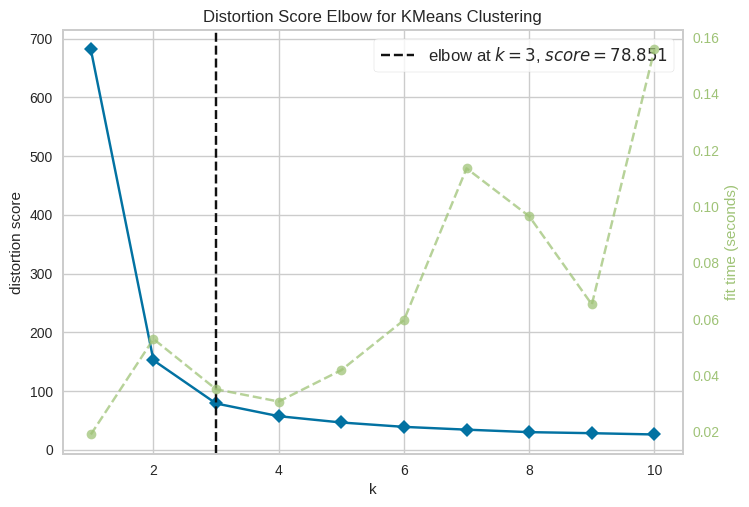

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
# Initialize the KMeans model with n_init explicitly set
model = KMeans(n_init=10, random_state=0)  # Set n_init explicitly to 10

# Creating a KElbowVisualizer object
visualizer = KElbowVisualizer(model, k=(1, 11))

# Fitting the data and show the elbow plot
visualizer.fit(x)  # Fit the data to the visualizer
visualizer.show()  # Finalize and render the figure

This is the optimal k value because it represents the point where the clustering is balanced between having too many clusters and having too few clusters. This means that the optimal number of clusters is 2 and the distortion score at k=2 is 152.369. The fit time at k=2 is 0.014 seconds.

In [9]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

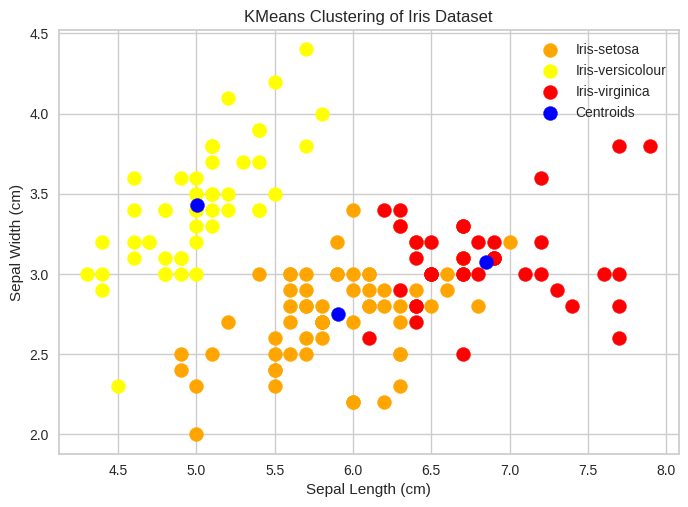

In [14]:
# VISUALISATION on the basis of sepal length and width

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],
            s = 100, c = 'ORANGE', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],
            s = 100, c = 'YELLOW', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'red', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
            s = 100, c = 'Blue', label = 'Centroids')
plt.title('KMeans Clustering of Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()

Wee see, based on the scatter plot created, versicolour can be differentiated from the other two styles of flowers, but the difference is not that prominant if we consider the sepal length and width.

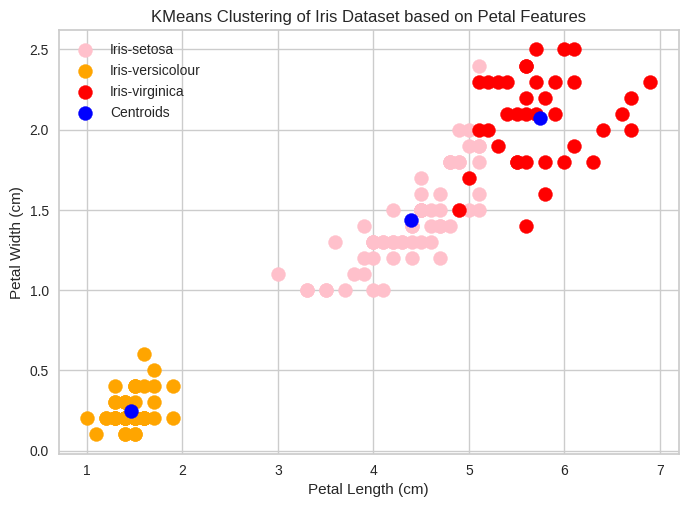

In [18]:
# VISUALISATION on the basis of petal length and width

# Assuming x and y_kmeans are defined and populated with appropriate values
# Scatter plots for each cluster based on petal length and petal width
plt.scatter(x[y_kmeans == 0, 2], x[y_kmeans == 0, 3],
            s = 100, c = 'pink', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 2], x[y_kmeans == 1, 3],
            s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 2], x[y_kmeans == 2, 3],
            s = 100, c = 'red', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3],
            s = 100, c = 'blue', label = 'Centroids')

# Add title, x-axis label, y-axis label, and legend
plt.title('KMeans Clustering of Iris Dataset based on Petal Features')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()


We can see that petal length and width are good features for distinguishing between the three species of iris.

The setosa flowers is different the other two species based on their petal length and width. The versicolor and virginica flowers are more difficult to distinguish from each other, but they can still be separated based on their petal length and width.